# Transform Data Pipeline to MTA Insights

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'

In [3]:
# Import Entries_per_day CSV sheet locally
df = pd.read_csv('../../data/Data_every_D.csv')
df.head()

,Unnamed: 0,Station,Line Name,SCP,C/A,Unit,Entries_per_day,Exits_per_day,Full Time
0,4,1 AV,L,00-00-00,H007,R248,2245.015903,3551.029236,2018-05-06 23:59:59
1,5,1 AV,L,00-00-00,H007,R248,3669.996319,4446.997778,2018-05-07 23:59:59
2,6,1 AV,L,00-00-00,H007,R248,3867.997917,4891.994722,2018-05-08 23:59:59
3,7,1 AV,L,00-00-00,H007,R248,3905.995764,4919.999861,2018-05-09 23:59:59
4,8,1 AV,L,00-00-00,H007,R248,4428.995625,4931.998056,2018-05-10 23:59:59


## Generate Top Stations by Daily Average Riders - May/June 2018
This section groups our cleaned pipeline data by station, and calculates average daily ridership over our period of interest (May/June 2018). The output is a chart of the top stations by average daily ridership in this period.

In [15]:
# Set a 15000 person cutoff for the max to get rid of nonsensical outliers
df = df.loc[(df['Entries_per_day'] < 15000), :]
df = df.loc[(df['Entries_per_day'] > 0), :]

In [16]:
twomonth = (df
 .groupby(['Station'])['Entries_per_day']
 .sum()
 .reset_index()
 .sort_values(['Entries_per_day'], ascending=[False,])
)
twomonth.head(5)

,Station,Entries_per_day
60,34 ST-PENN STA,8.037565e+06
232,GRD CNTRL-42 ST,7.145788e+06
58,34 ST-HERALD SQ,6.151864e+06
45,23 ST,5.518976e+06
14,14 ST-UNION SQ,5.293547e+06


In [17]:
twomonth.rename(columns={'Entries_per_day':'2months'},inplace=True)

# Get Top 10 Stations
topten_twomonth = twomonth.head(10)
topten_twomonth

,Station,2months
60,34 ST-PENN STA,8.037565e+06
232,GRD CNTRL-42 ST,7.145788e+06
58,34 ST-HERALD SQ,6.151864e+06
45,23 ST,5.518976e+06
14,14 ST-UNION SQ,5.293547e+06
352,TIMES SQ-42 ST,5.204535e+06
67,42 ST-PORT AUTH,5.122334e+06
225,FULTON ST,4.663027e+06
109,86 ST,4.018544e+06
9,125 ST,4.010080e+06


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Station')

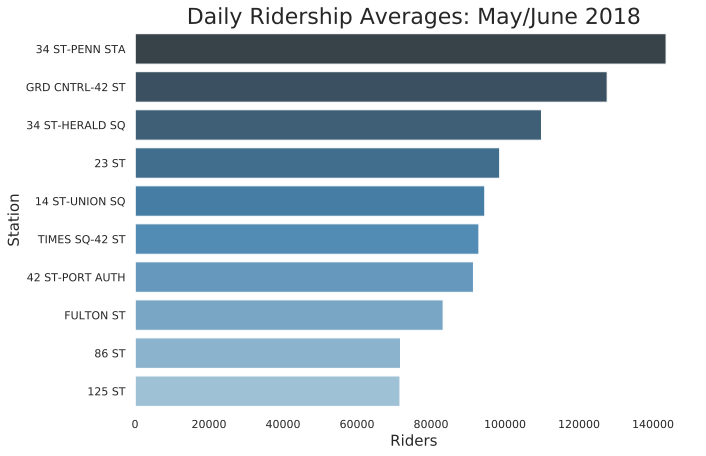

In [18]:
topten_twomonth['mean_entries'] = topten_twomonth['2months'] / 56
plt.figure(figsize=(10,7))
ax = sns.barplot(x='mean_entries',y='Station',data=topten_twomonth, palette="Blues_d")
sns.set(rc={'axes.facecolor':'white' },font_scale=1)
ax.set_title('Daily Ridership Averages: May/June 2018',fontsize=22)
ax.set_xlabel("Riders", fontsize=15)
ax.set_ylabel("Station",fontsize=15)

## Top Weekday Stations
This next bit also pulls out the top 15 weekday stations. We look at this later to help figure out a final recommendation, as in another notebook we find that that the weekday traffic is significantly higher than weekend traffic so we won't send flyer teams on weekends

In [19]:
# Make a numeric column corresponding to weekday
df['FullDate'] = pd.to_datetime(df['Full Time'])
df['weekday'] = df['FullDate'].dt.weekday
dic = {0:'weekday',1:'weekday',2:'weekday',3:'weekday',4:'weekday',5:'weekend',6:'weekend'}
df['weekday'].replace(dic,inplace=True)
df.head()

,Unnamed: 0,Station,Line Name,SCP,C/A,Unit,Entries_per_day,Exits_per_day,Full Time,FullDate,weekday
0,4,1 AV,L,00-00-00,H007,R248,2245.015903,3551.029236,2018-05-06 23:59:59,2018-05-06 23:59:59,weekend
1,5,1 AV,L,00-00-00,H007,R248,3669.996319,4446.997778,2018-05-07 23:59:59,2018-05-07 23:59:59,weekday
2,6,1 AV,L,00-00-00,H007,R248,3867.997917,4891.994722,2018-05-08 23:59:59,2018-05-08 23:59:59,weekday
3,7,1 AV,L,00-00-00,H007,R248,3905.995764,4919.999861,2018-05-09 23:59:59,2018-05-09 23:59:59,weekday
4,8,1 AV,L,00-00-00,H007,R248,4428.995625,4931.998056,2018-05-10 23:59:59,2018-05-10 23:59:59,weekday


In [20]:
#Rename column
df.rename(columns={'Entries_per_day':'2months'},inplace=True)

In [9]:
# Weekday specific Top 10 stations Aggregation
dfwkday = df.loc[df.weekday == 'weekday']
dfwkday = (dfwkday
 .groupby(['Station'])['2months']
 .sum()
 .reset_index()
 .sort_values(['2months'], ascending=[False,])
)

# Get Top 10 Stations
topten_twomonth_wkday = dfwkday.head(15)
topten_twomonth_wkday

,Station,2months
60,34 ST-PENN STA,6.801194e+06
232,GRD CNTRL-42 ST,6.305702e+06
58,34 ST-HERALD SQ,5.134159e+06
45,23 ST,4.775271e+06
14,14 ST-UNION SQ,4.256232e+06
352,TIMES SQ-42 ST,4.253538e+06
67,42 ST-PORT AUTH,4.126553e+06
225,FULTON ST,4.065088e+06
109,86 ST,3.337948e+06
9,125 ST,3.224161e+06


## Average Wait Beyond Scheduled Time
MTA provides data by month on which of its lines have above the expected wait times. We take a look at that here, and see how it compares with the stations we are thinking of for recommendations later

In [21]:
wait = pd.read_csv('../../data/avgwait.csv')

In [22]:
wait

,line,additional platform time
0,L,1.57
1,C,1.57
2,B,1.54
3,7,1.40
4,D,1.38
5,R,1.36
6,Q,1.33
7,JZ,1.23
8,F,1.19
9,A,1.18


Text(0.5, 1.0, 'Above-Expected Platform Wait Time by Line: May/June 2018')

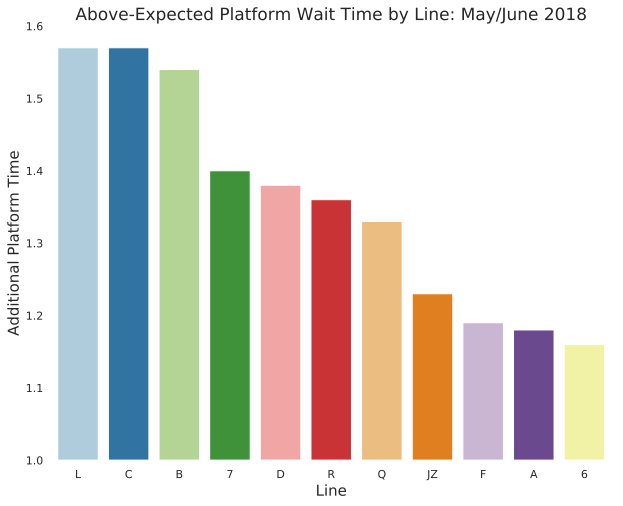

In [23]:
#topten_twomonth_wknd['avg_entries'] = topten_twomonth_wknd['2months'] / 17
plt.figure(figsize=(10,8))
#ax = sns.barplot(x='avg_entries',y='Station',data=topten_twomonth_wknd, palette="Blues_d")
ax = sns.barplot(x="line", y="additional platform time", data=wait, palette="Paired")

sns.set(rc={'axes.facecolor':'white' }, font_scale=1)
#ax.set(xlabel='Riders', ylabel='Stations')
ax.set_xlabel("Line",fontsize=15)
ax.set_ylabel("Additional Platform Time",fontsize=15)

ax.set(ylim=(1.0, 1.6))

#ax.set(xlabel='Riders', ylabel='Stations')
ax.set_title('Above-Expected Platform Wait Time by Line: May/June 2018',fontsize=17)


## Extra Wait Lines interesecting Top Traffic Stations
Bolded areas show which lines at our top stations also have above average wait times. Since trains on these lines would stop, you could assume that it would have some downstream impact on the major stations for that line

| Station | Lines   |
|------|------|
|   34th St Penn  | 1,2,3,**A,B,C**|
|   Grand Central 42nd  | S,4,5,**6,7**|
|   34th St Herald  | N,M,W,**Q,R,B,D,F**|
|   23rd St  | N,M,W,**Q,R,F**|
|   14th St Union Sq  | W,4,5,**L,N,Q,R,6**|
|   Times Sq 42nd St  | S,1,2,3,E,N,**7,A,C,Q,R**|
|   42nd St Port Authority  | W,1,2,3,S,G,N,E,**A,C,R,7**|
|   Fulton St  | 2,3,4,5,**A,C,JZ**|
|   86th St | N,4,5,**Q,R,6**|
|   125th St  | 4,5,**6**|
|   Canal St  | 4,N,W,**Q,R,6,JZ**|
|   59th St Columbus  | 1,2,**A,B,C,D**|